In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
world = pd.read_csv("world_development_data_imputed.csv")

Text(0, 0.5, 'GDP')

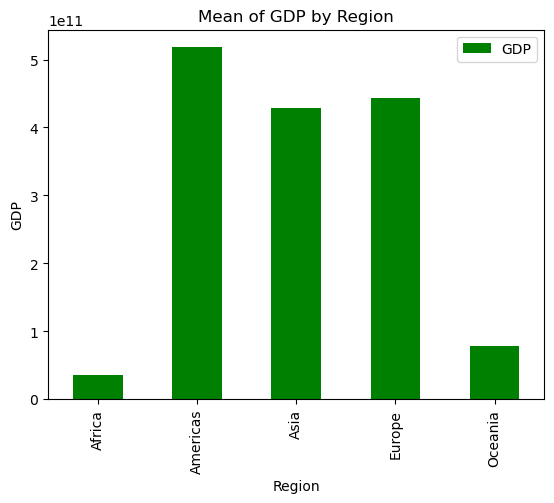

In [3]:
# Bar Graph
world[["Region", "GDP"]].groupby("Region").agg("mean").plot.bar(color= "green")
plt.title("Mean of GDP by Region")
plt.xlabel("Region")
plt.ylabel("GDP")

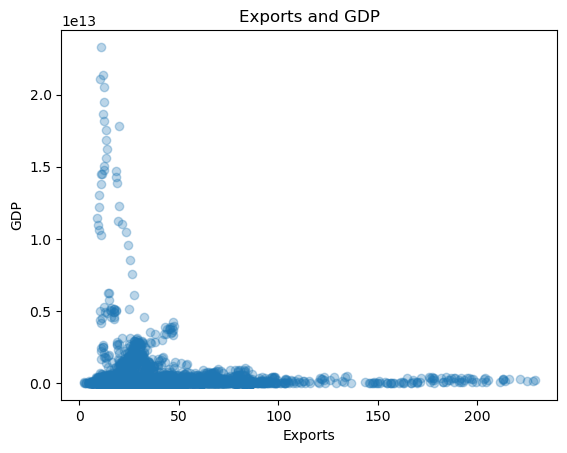

In [4]:
# Scatter Plot
plt.scatter(world["Exports%GDP"], world["GDP"], alpha = 0.3)
plt.title("Exports and GDP")
plt.xlabel("Exports")
plt.ylabel("GDP")
plt.show()

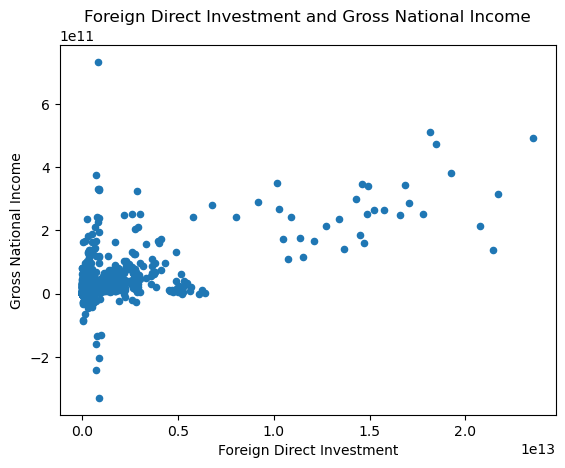

In [5]:
# Scatter Plot
world.plot.scatter(y="FDINetBoP", x="GNIAtlas")
plt.title("Foreign Direct Investment and Gross National Income")
plt.xlabel("Foreign Direct Investment")
plt.ylabel("Gross National Income")
plt.show()
plt.show()

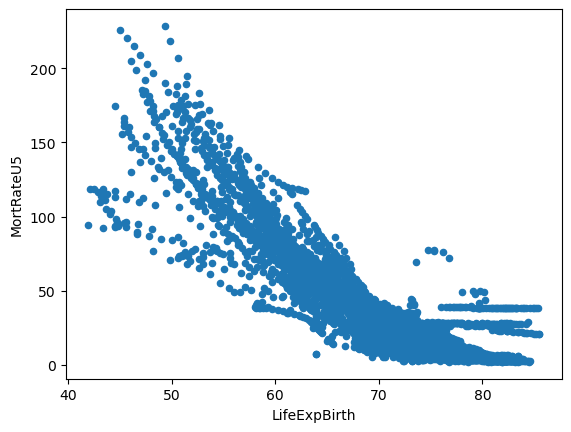

In [7]:
# Regression 1
world.plot.scatter(y = "MortRateU5", x = "LifeExpBirth")
plt.show()

In [8]:
import statsmodels.api as sm
Y = world["MortRateU5"]
X = world["LifeExpBirth"]
Xfull = sm.add_constant(X)

In [9]:
fit = sm.OLS(Y, Xfull).fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             MortRateU5   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                 1.552e+04
Date:                Fri, 17 Nov 2023   Prob (F-statistic):               0.00
Time:                        09:00:26   Log-Likelihood:                -19291.
No. Observations:                4444   AIC:                         3.859e+04
Df Residuals:                    4442   BIC:                         3.860e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          315.7575      2.249    140.407      0.000     311.349     320.166
LifeExpBirth    -3.9586      0.032   -124.584      0.000      -4.021      -3.896
==============================================================================
Omnibus:                      674.884   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1484.223
Skew:                           0.892   Prob(JB):                         0.00
Kurtosis:                       5.198   Cond. No.                         571.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
import statsmodels.api as sm
Y = world["MortRateU5"]
X = world["LifeExpBirth"]
Xfull = sm.add_constant(X)

In [11]:
print(fit.params[0])
print(fit.params[1])

315.7575404155986
-3.9586008089270535


In [12]:
# So we can store them as a and b
a = fit.params[0]
b = fit.params[1]
world["FittedManual"] = a + b * world["LifeExpBirth"]

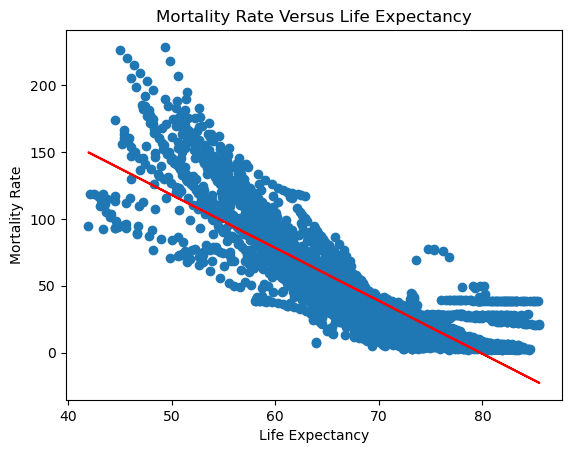

In [13]:
world.head()
world["Fitted"] = fit.fittedvalues
world.head()
plt.scatter(world["LifeExpBirth"], world["MortRateU5"],)
plt.plot(world["LifeExpBirth"], world["Fitted"], color = "red")
plt.title("Mortality Rate Versus Life Expectancy")
plt.xlabel("Life Expectancy")
plt.ylabel("Mortality Rate")
plt.show()

In [6]:
# Regression 2
dummies1 = pd.get_dummies(world["Region"], drop_first = True)
dummies1.head()

Americas  Asia  Europe  Oceania
0         0     1       0        0
1         0     0       1        0
2         0     0       1        0
3         0     0       0        1
4         0     0       0        0

In [14]:
dummies1.columns

Index(['Americas', 'Asia', 'Europe', 'Oceania'], dtype='object')

In [15]:
world[dummies1.columns] = dummies1
world.head()

Year           Country   Region           SubRegion  SurfAreaSqKm  \
0  2000.0       Afghanistan     Asia       Southern Asia      652860.0   
1  2000.0             Malta   Europe     Southern Europe         320.0   
2  2000.0           Belgium   Europe      Western Europe       30530.0   
3  2000.0  Marshall Islands  Oceania          Micronesia         180.0   
4  2000.0        Mauritania   Africa  Sub-Saharan Africa     1030700.0   

     PopTotal      PopDens  PopGrowth%           GDP  GDPGrowth%  ...  \
0  19542982.0    29.963329    1.443803  1.801248e+10   -5.206288  ...   
1    390087.0  1219.021875    0.645267  4.323339e+09   19.681791  ...   
2  10251250.0   338.548547    0.242518  2.367925e+11    3.716679  ...   
3     54224.0   301.244444    0.721838  1.153475e+08    1.354079  ...   
4   2695003.0     2.614731    2.799182  1.779521e+09   -3.918026  ...   

   MobileSubs/100  MortRateU5    NetMigr  UrbanPopGrowth%  FittedManual  \
0        0.000000       129.3 -1007135.0         1.861377     96.854833   
1       28.667475         7.6     1799.0         0.952299      5.605995   
2       54.840339         5.9    32262.0         0.308431      8.087361   
3        0.824358        42.1    -1323.0         1.492787     65.277074   
4        0.567717        98.8    -2997.0         2.476860     74.172050   

      Fitted  Americas  Asia  Europe  Oceania  
0  96.854833         0     1       0        0  
1   5.605995         0     0       1        0  
2   8.087361         0     0       1        0  
3  65.277074         0     0       0        1  
4  74.172050         0     0       0        0  

[5 rows x 32 columns]

In [16]:
X2 = dummies1
X2full = sm.add_constant(X2)
X2full.head()

const  Americas  Asia  Europe  Oceania
0    1.0         0     1       0        0
1    1.0         0     0       1        0
2    1.0         0     0       1        0
3    1.0         0     0       0        1
4    1.0         0     0       0        0

In [17]:
Y = pd.DataFrame(world["UrbanPopGrowth%"])
sm.OLS(Y, X2full).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        UrbanPopGrowth%   R-squared:                       0.343
Model:                            OLS   Adj. R-squared:                  0.343
Method:                 Least Squares   F-statistic:                     579.6
Date:                Fri, 17 Nov 2023   Prob (F-statistic):               0.00
Time:                        09:00:50   Log-Likelihood:                -8363.3
No. Observations:                4444   AIC:                         1.674e+04
Df Residuals:                    4439   BIC:                         1.677e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.5378      0.047     75.991      0.000       3.447       3.629
Americas      -2.2638      0.070    -32.332      0.000      -2.401      -2.127
Asia          -0.9664      0.067    -14.387      0.000      -1.098      -0.835
Europe        -3.0786      0.070    -43.969      0.000      -3.216      -2.941
Oceania       -1.9972      0.097    -20.658      0.000      -2.187      -1.808
==============================================================================
Omnibus:                     1705.286   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            39415.371
Skew:                           1.288   Prob(JB):                         0.00
Kurtosis:                      17.361   Cond. No.                         5.43
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""